In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [53]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1:], iris.target[:-1]  #except the last row 
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [11]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

attributes
Independent Variable

<ul>
    <li>petal length</li>
    <li>petal width</li>
    <li>sepal length</li>
    <li>sepal width</li>
</ul>
Dependent Variable
<ul>    
    <li>Species
        <ul>
            <li>Iris setosa</li>
            <li>Iris virginica</li>
            <li>Iris versicolor</li>
        </ul>
    </li>
</ul>

In [50]:
numFeatures = trainX.shape[1]
print(numFeatures)

4


In [51]:
numLabels = trainY.shape[1]
print(numLabels)

3


In [54]:
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')

In [55]:
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [56]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))


$$
ŷ =sigmoid(WX+b)
$$

In [57]:
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

In [92]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [93]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [94]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [95]:
# Optimization process. 

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

In [96]:
# Initialize reporting variables
display_step = 100
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if (i%100==0):
        print("change in loss %g; convergence."%diff)

    # Run training step
    run_optimization(trainX, trainY)

    # Report occasional stats
    if i % display_step == 0:
        # Add epoch to epoch_values
        epoch_values.append(i)

        pred = logistic_regression(testX)

        newLoss = loss_object(pred, testY)
        # Add loss to live graphing variable
        loss_values.append(newLoss)

        # Generate accuracy stats on test data
        acc = accuracy(pred, testY)
        accuracy_values.append(acc)


        # Re-assign values for variables
        diff = abs(newLoss - loss)
        loss = newLoss

        #generate print statements
        print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))



          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())




change in loss 1; convergence.
step 0, training accuracy 0.7, loss 0.082404, change in loss 0.082404
change in loss 0.082404; convergence.
step 100, training accuracy 0.7, loss 0.0821856, change in loss 0.000218391
change in loss 0.000218391; convergence.
step 200, training accuracy 0.7, loss 0.0819798, change in loss 0.000205748
change in loss 0.000205748; convergence.
step 300, training accuracy 0.7, loss 0.0817859, change in loss 0.000193901
change in loss 0.000193901; convergence.
step 400, training accuracy 0.7, loss 0.0816031, change in loss 0.000182807
change in loss 0.000182807; convergence.
step 500, training accuracy 0.7, loss 0.0814307, change in loss 0.000172414
change in loss 0.000172414; convergence.
step 600, training accuracy 0.7, loss 0.081268, change in loss 0.000162669
final accuracy on test set: 0.7


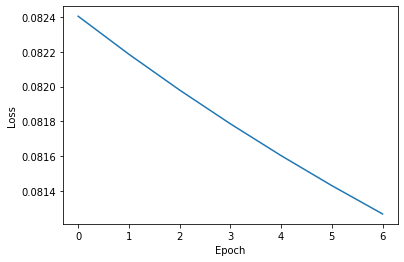

In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()